<a href="https://colab.research.google.com/github/RishitSingh10/Neural-Style-Transfer/blob/main/NST_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Dependencies and Load Pretrained NST Model

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [4]:
model = hub.load('https://kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/2')

## Preprocess Image and Load

In [5]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]
  return img

In [19]:
!wget https://i.pinimg.com/originals/56/9e/0b/569e0bbd9dcdc7e52d0aa86b80eccd93.jpg
!wget https://afremov.com/media/catalog/product/image_48_1_2.jpeg
!wget https://www.singulart.com/blog/wp-content/uploads/2023/09/Self-portrait-with-Straw-Hat-1887-88-857x1024.jpg

content_image = load_image('569e0bbd9dcdc7e52d0aa86b80eccd93.jpg')
style_image = load_image('image_48_1_2.jpeg')

--2023-12-21 09:20:25--  https://i.pinimg.com/originals/56/9e/0b/569e0bbd9dcdc7e52d0aa86b80eccd93.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.54.155.13, 23.54.155.7, 2600:1417:3f::b81c:eb50, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.54.155.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208866 (204K) [image/jpeg]
Saving to: ‘569e0bbd9dcdc7e52d0aa86b80eccd93.jpg.2’

569e0bbd9dcdc7e52d0 100%[===================>] 203.97K  --.-KB/s    in 0.005s  

2023-12-21 09:20:25 (41.4 MB/s) - ‘569e0bbd9dcdc7e52d0aa86b80eccd93.jpg.2’ saved [208866/208866]

--2023-12-21 09:20:25--  https://afremov.com/media/catalog/product/image_48_1_2.jpeg
Resolving afremov.com (afremov.com)... 52.8.55.240
Connecting to afremov.com (afremov.com)|52.8.55.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388455 (379K) [image/jpeg]
Saving to: ‘image_48_1_2.jpeg.2’

image_48_1_2.jpeg.2 100%[===================>] 379.35K   713KB/s    in 0.5s    

2023-12-2

## Visualize

Text(0.5, 1.0, 'Style Image, (1, 1064, 1623, 3)')

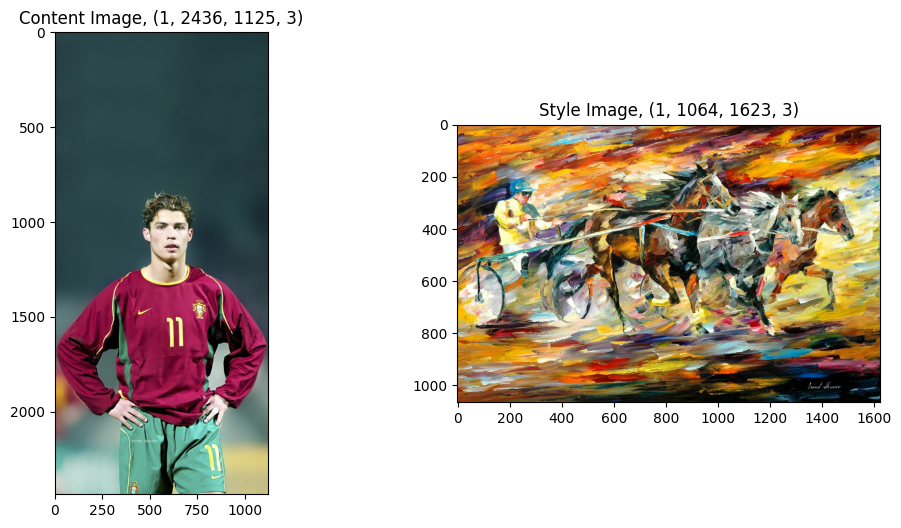

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))

ax[0].imshow(tf.squeeze(content_image))
ax[0].set_title(f'Content Image, {content_image.shape}')

ax[1].imshow(tf.squeeze(style_image))
ax[1].set_title(f'Style Image, {style_image.shape}')

## Stylize Image

In [21]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

Text(0.5, 1.0, 'Stylized Image (1, 2436, 1128, 3)')

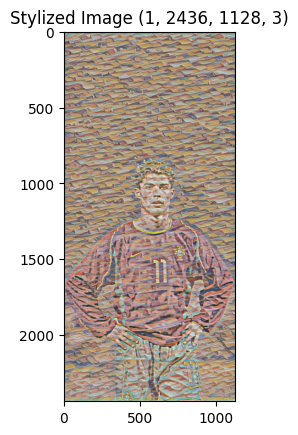

In [22]:
plt.imshow(tf.squeeze(stylized_image))
plt.title(f'Stylized Image {stylized_image.shape}')